In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
%matplotlib inline

In [ ]:
combine_stocks = pd.read_csv('combine_stocks3.csv', index_col=['Date'], parse_dates=['Date'])
combine_stocks

FileNotFoundError: ignored

In [ ]:
Lucid_Close = combine_stocks["Lucid_Close"]
Lucid_Close

Date
2023-11-03    4.62
2023-11-02    4.54
2023-11-01    4.05
2023-10-31    4.12
2023-10-30    4.07
              ... 
2013-11-11     NaN
2013-11-08     NaN
2013-11-07     NaN
2013-11-06     NaN
2013-11-05     NaN
Name: Lucid_Close, Length: 2517, dtype: float64

In [ ]:
Lucid_Close = Lucid_Close[~np.isnan(Lucid_Close)]
Lucid_Close

Date
2023-11-03    4.62
2023-11-02    4.54
2023-11-01    4.05
2023-10-31    4.12
2023-10-30    4.07
              ... 
2020-09-24    9.77
2020-09-23    9.85
2020-09-22    9.88
2020-09-21    9.86
2020-09-18    9.89
Name: Lucid_Close, Length: 788, dtype: float64

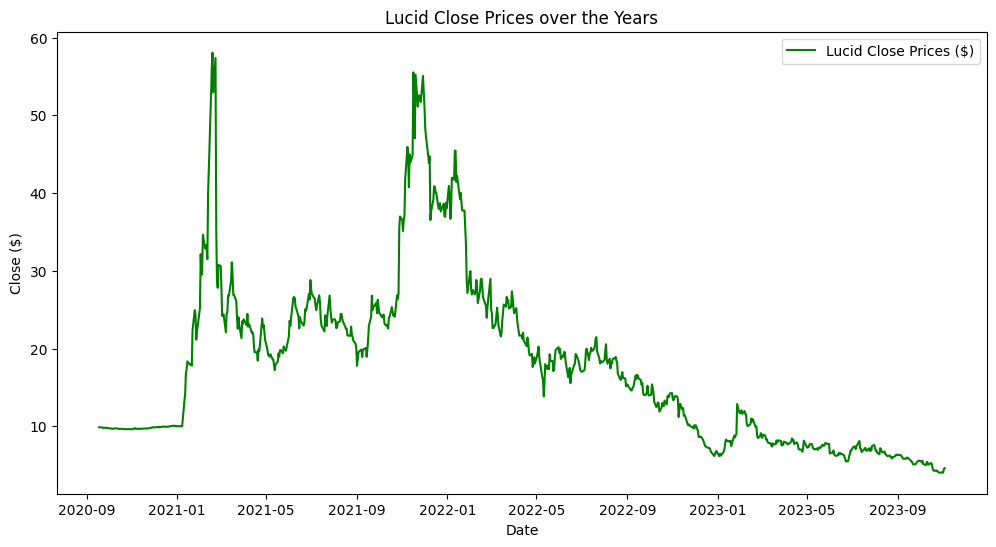

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Lucid_Close.index, Lucid_Close, label='Lucid Close Prices ($)', color='green')
plt.title('Lucid Close Prices over the Years')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [ ]:
mean_lucid_close = Lucid_Close.mean()
std_deviation_lucid = Lucid_Close.std()
print(mean_lucid_close)
print(std_deviation_lucid)

17.728529822335027
10.838624345102238


Creating A 5-day Rolling Average

In [ ]:
# rolling_mean_lucid = Lucid_Close.rolling(window=5).mean()

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(Lucid_Close.index, Lucid_Close, label='Lucid', color='green')
# plt.plot(rolling_mean_lucid.index, rolling_mean_lucid, label='Rolling Mean Lucid Trend', color='orange')
# plt.title('Lucid Time Series with 5 Day Window Rolling Mean')
# plt.xlabel('Date')
# plt.ylabel('Exchange Rate')
# plt.legend()
# plt.show()

In [ ]:
# ma_day = [30,60,120,150]

# for ma in ma_day:
#         column_name = f"MA for {ma} days"
#         combine_stocks[column_name] = combine_stocks['Lucid_Close'].rolling(ma).mean()

In [ ]:
# plt.figure(figsize=(30,15))
# plt.plot(combine_stocks['Lucid_Close'],label='Close Price')
# plt.plot(combine_stocks['MA for 30 days'],label='30 days MA')
# plt.plot(combine_stocks['MA for 60 days'],label='60 days MA')
# plt.plot(combine_stocks['MA for 120 days'],label='120 days MA')
# plt.plot(combine_stocks['MA for 150 days'],label='150 days MA')
# plt.legend()
# plt.show()

In [ ]:
ma_day = [10,50,200]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        combine_stocks[column_name] = combine_stocks['Lucid_Close'].rolling(ma).mean()

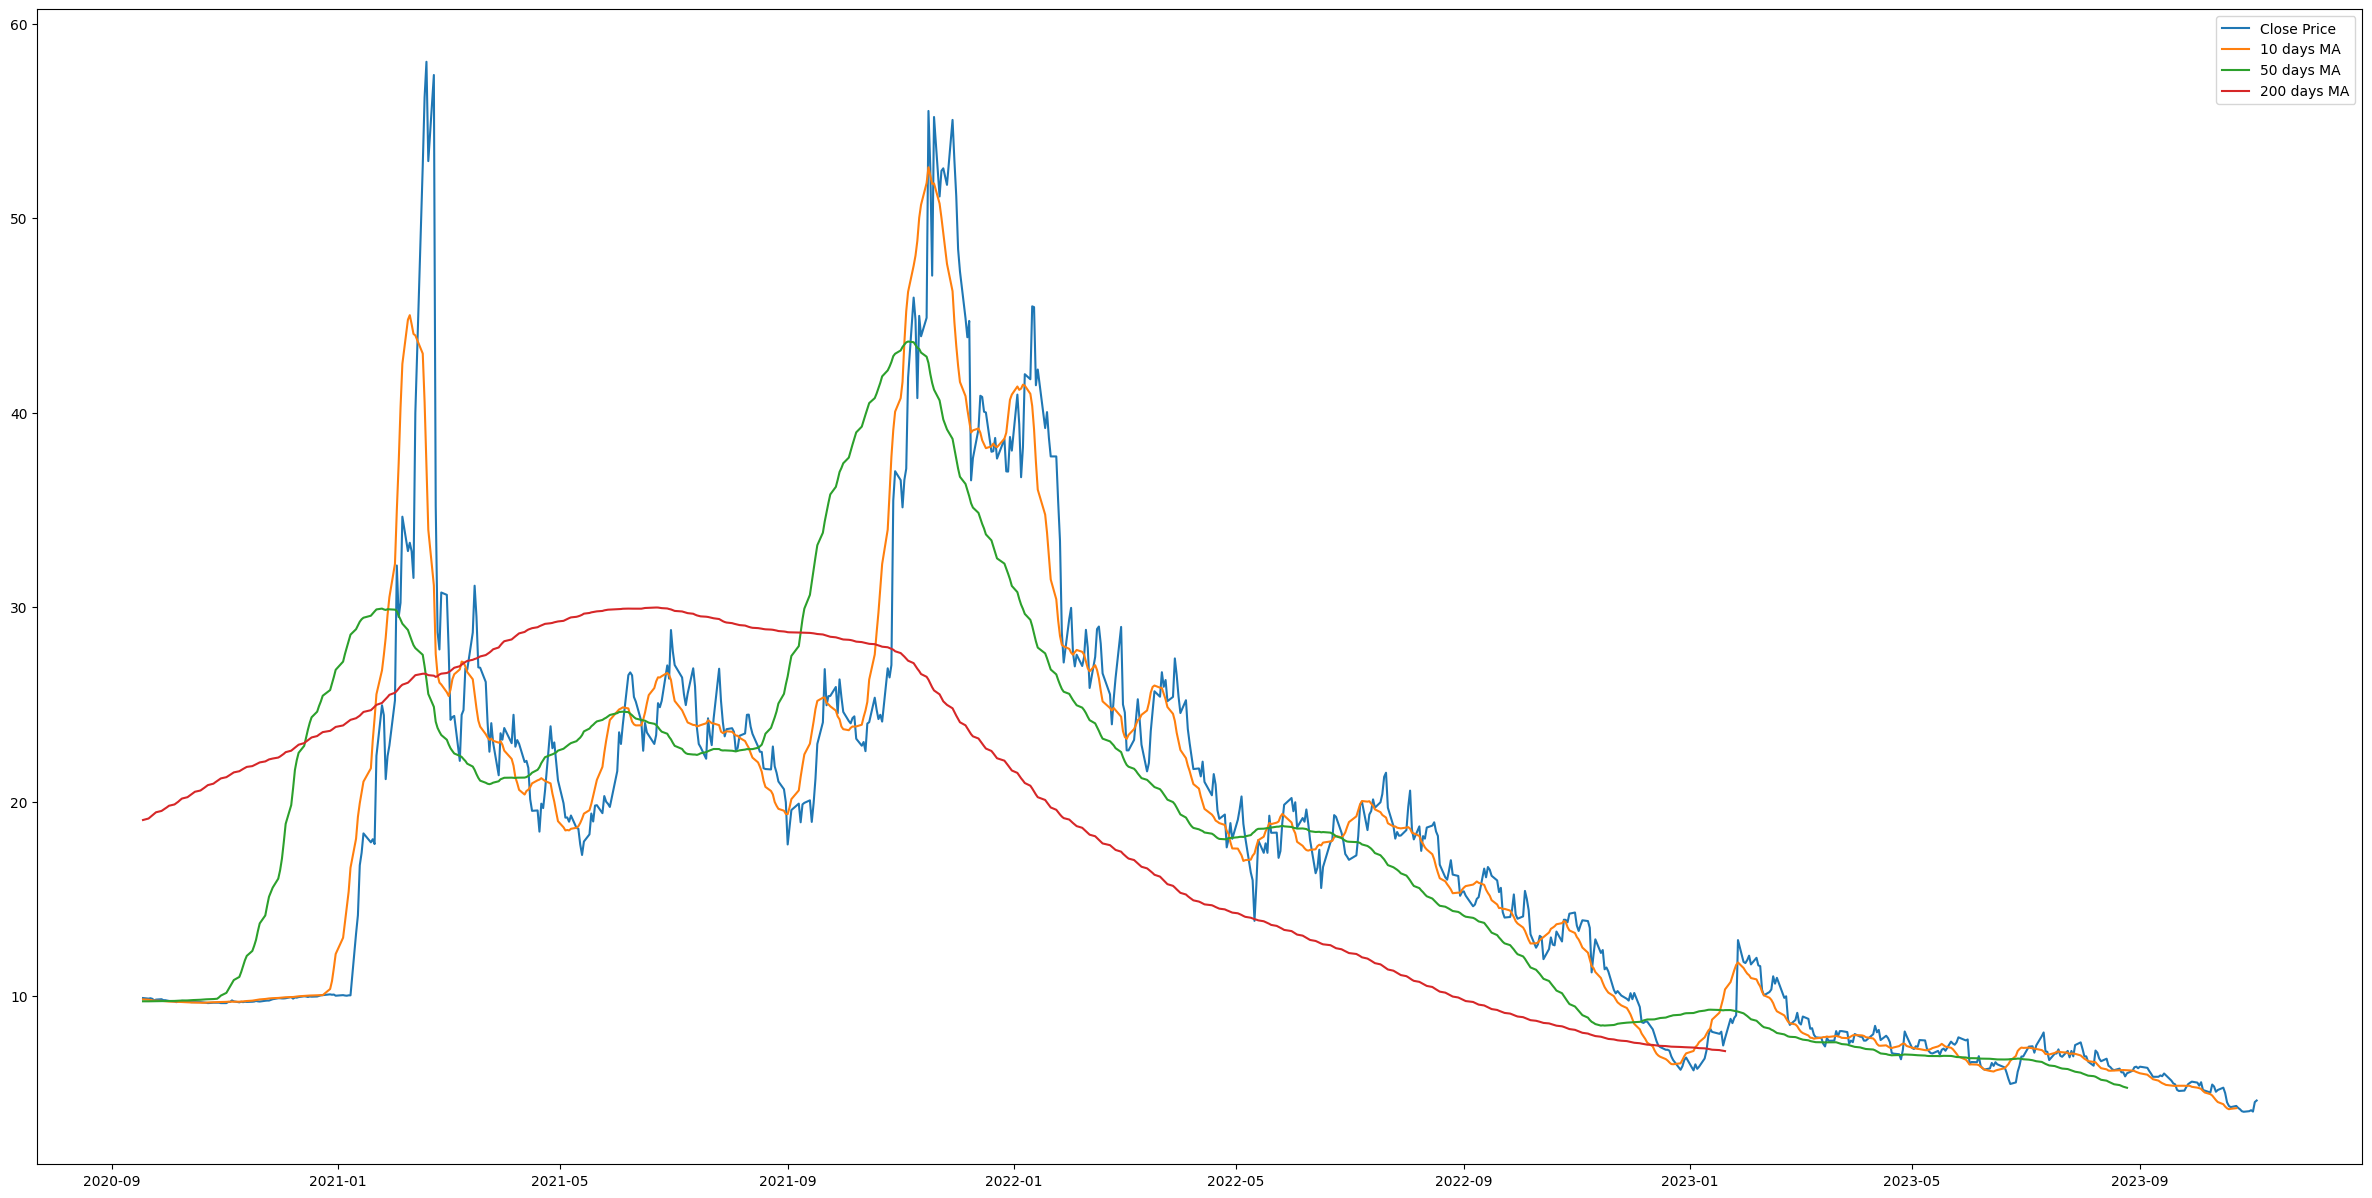

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(combine_stocks['Lucid_Close'],label='Close Price')
plt.plot(combine_stocks['MA for 10 days'],label='10 days MA')
plt.plot(combine_stocks['MA for 50 days'],label='50 days MA')
plt.plot(combine_stocks['MA for 200 days'],label='200 days MA')
plt.legend()
plt.show()

In [ ]:
Lucid_Closed_Series = combine_stocks [['Lucid_Close']]
Lucid_Closed_Series

,Lucid_Close
Date,
2023-11-03,4.62
2023-11-02,4.54
2023-11-01,4.05
2023-10-31,4.12
2023-10-30,4.07
...,...
2013-11-11,NaN
2013-11-08,NaN
2013-11-07,NaN


In [ ]:
Lucid_Closed_Series = Lucid_Closed_Series[~np.isnan(Lucid_Closed_Series).any(axis=1)]
Lucid_Closed_Series

,Lucid_Close
Date,
2023-11-03,4.62
2023-11-02,4.54
2023-11-01,4.05
2023-10-31,4.12
2023-10-30,4.07
...,...
2020-09-24,9.77
2020-09-23,9.85
2020-09-22,9.88


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
Lucid_Closed_Series = scaler.fit_transform(Lucid_Closed_Series)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(Lucid_Closed_Series) * 0.80)
test_size = len(Lucid_Closed_Series) - train_size
train_data, test_data = Lucid_Closed_Series[0:train_size], Lucid_Closed_Series[train_size:len(Lucid_Closed_Series)]

In [ ]:
print("train_size: ", train_size)
print("test_size: ", test_size)

train_size:  630
test_size:  158


In [ ]:
# Create sequences for time series forecasting
def create_sequences(Lucid_Closed_Series, look_back):
    X, y = [], []
    for i in range(len(Lucid_Closed_Series) - look_back):
        X.append(Lucid_Closed_Series[i:(i+look_back), 0])
        y.append(Lucid_Closed_Series[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

In [ ]:
# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=2000, batch_size=32)

Epoch 1/2000
20/20 [==============================] - 4s 13ms/step - loss: 0.0611
Epoch 2/2000
20/20 [==============================] - 0s 12ms/step - loss: 0.0127
Epoch 3/2000
20/20 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 4/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0028
Epoch 5/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0024
Epoch 6/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 7/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 8/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 9/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0022
Epoch 10/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0023
Epoch 11/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 12/2000
20/20 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 13/2000

In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [ ]:
# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [ ]:
# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")

Train RMSE: 1.6651
Test RMSE: 3.6644


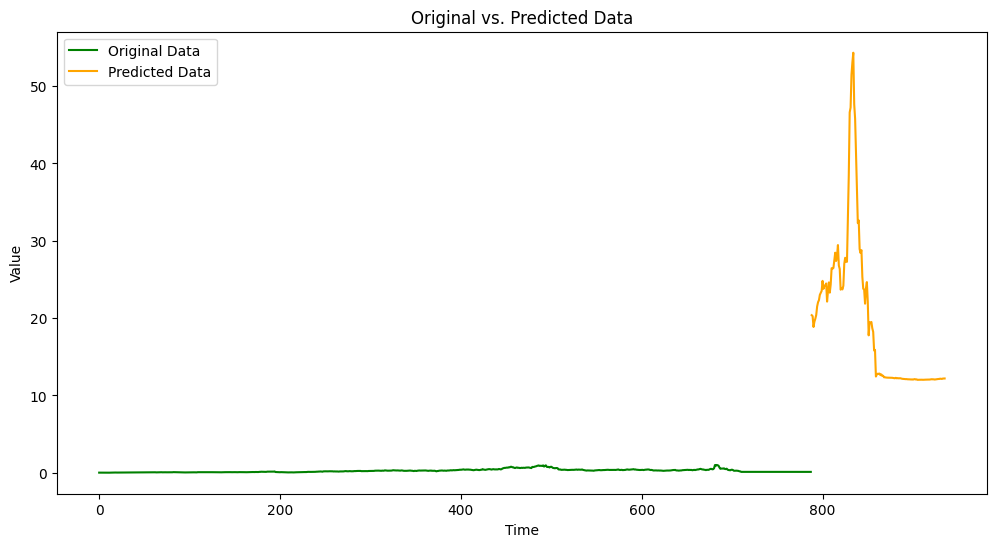

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(Lucid_Closed_Series)), Lucid_Closed_Series, label='Original Data', color='green')
plt.plot(np.arange(len(Lucid_Closed_Series), len(Lucid_Closed_Series) + len(test_predict)), test_predict, label='Predicted Data', color='orange')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
Lucid_Predictions = combine_stocks ["Lucid_Close"]
Lucid_Predictions

Date
2023-11-03    4.62
2023-11-02    4.54
2023-11-01    4.05
2023-10-31    4.12
2023-10-30    4.07
              ... 
2013-11-11     NaN
2013-11-08     NaN
2013-11-07     NaN
2013-11-06     NaN
2013-11-05     NaN
Name: Lucid_Close, Length: 2517, dtype: float64

In [ ]:
Lucid_Predictions = Lucid_Predictions[~np.isnan(Lucid_Predictions)]
Lucid_Predictions

Date
2023-11-03    4.62
2023-11-02    4.54
2023-11-01    4.05
2023-10-31    4.12
2023-10-30    4.07
              ... 
2020-09-24    9.77
2020-09-23    9.85
2020-09-22    9.88
2020-09-21    9.86
2020-09-18    9.89
Name: Lucid_Close, Length: 788, dtype: float64

In [ ]:
log_returns_Lucid = np.log(1+ Lucid_Predictions.pct_change())
log_returns_Lucid.head()

Date
2023-11-03         NaN
2023-11-02   -0.017468
2023-11-01   -0.114210
2023-10-31    0.017136
2023-10-30   -0.012210
Name: Lucid_Close, dtype: float64

In [ ]:
mean_lucid = log_returns_Lucid.mean()
var_lucid = log_returns_Lucid.var()
print(mean_lucid)
print(var_lucid)

0.0009671276245755674
0.0033751445366745274


In [ ]:
stdev_lucid = log_returns_Lucid.std()
drift_lucid = mean_lucid -(0.5 * var_lucid) # u = average log return - half variance

drift_lucid
stdev_lucid

np.array(drift_lucid)
norm.ppf(0.95)

1.6448536269514722

In [ ]:
x_1 = np.random.rand(10,2) # to complete the second component aka volatility need to randomize using numpy. (10,2) turn our arrray into a multi dimensional one 2 columns by 10 r
x_1

array([[0.85540856, 0.02734078],
       [0.04543867, 0.05259717],
       [0.38038082, 0.56411226],
       [0.24328633, 0.24224849],
       [0.2333634 , 0.93422691],
       [0.01034353, 0.07757766],
       [0.20991457, 0.99588588],
       [0.19978789, 0.51532159],
       [0.00953092, 0.39441083],
       [0.46955997, 0.90579076]])

In [ ]:
norm.ppf(x_1)

array([[ 1.05991585, -1.92139795],
       [-1.69078783, -1.62017662],
       [-0.30448078,  0.16140367],
       [-0.69577036, -0.69908808],
       [-0.72781506,  1.50803258],
       [-2.31364773, -1.42155556],
       [-0.80671772,  2.64255784],
       [-0.84237911,  0.03841498],
       [-2.34431954, -0.26784107],
       [-0.07637602,  1.31527206]])

In [ ]:
t_intervals_1 = 365 # t_intervals = time intervals. interested in forecast stock prices fornext 1000 days
iterations_1 = 5 # asking computer to produce 10 series of future stock price predicitions

In [ ]:
daily_returns_1 = np.exp(drift_lucid + stdev_lucid * norm.ppf(np.random.rand(t_intervals_1, iterations_1)))
daily_returns_1

array([[0.99300272, 0.88402008, 0.9046571 , 1.023936  , 1.03725555],
       [0.95044164, 0.94460639, 0.96849114, 0.96825148, 1.03977996],
       [0.98112997, 1.07044873, 0.99941337, 1.04015622, 0.97401869],
       ...,
       [1.01780058, 1.15793514, 1.00965893, 0.93984224, 1.06732914],
       [1.05581233, 0.95966474, 1.09888813, 0.99737606, 1.08572917],
       [0.97935585, 1.04014072, 1.11575757, 0.99248125, 1.01060301]])

In [ ]:
S0_0 = Lucid_Predictions.iloc[-1]
S0_0

9.89

In [ ]:
prices_list_1= np.zeros_like(daily_returns_1) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list_1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
prices_list_1[0] = S0_0 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list_1

array([[9.89, 9.89, 9.89, 9.89, 9.89],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  ]])

In [ ]:
for t in range(1, t_intervals_1): # this loop starts at day 1 and ends of day 1000
  prices_list_1[t] = prices_list_1[t-1] * daily_returns_1[t]

prices_list_1

array([[  9.89      ,   9.89      ,   9.89      ,   9.89      ,
          9.89      ],
       [  9.39986783,   9.34215718,   9.57837734,   9.57600716,
         10.28342381],
       [  9.22249208,  10.00030027,   9.57275837,   9.9605434 ,
         10.01624703],
       ...,
       [  1.95534313, 128.56073209,  12.04482574,  47.88601356,
         12.98359842],
       [  2.06447538, 123.37520137,  13.23591608,  47.76036363,
         14.09667151],
       [  2.02185605, 128.32757127,  14.76807362,  47.40126536,
         14.24613865]])

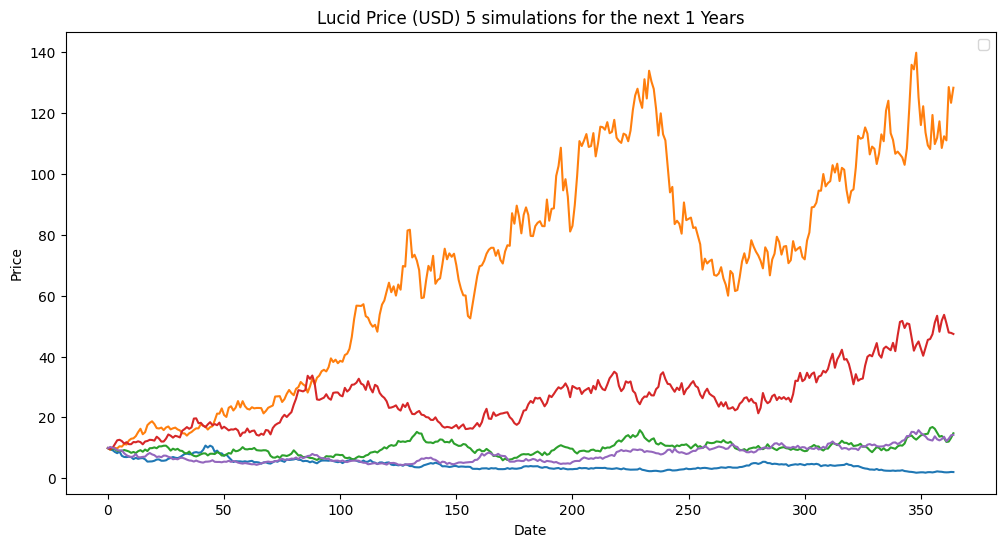

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(prices_list_1)
plt.title('Lucid Price (USD) 5 simulations for the next 1 Years')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

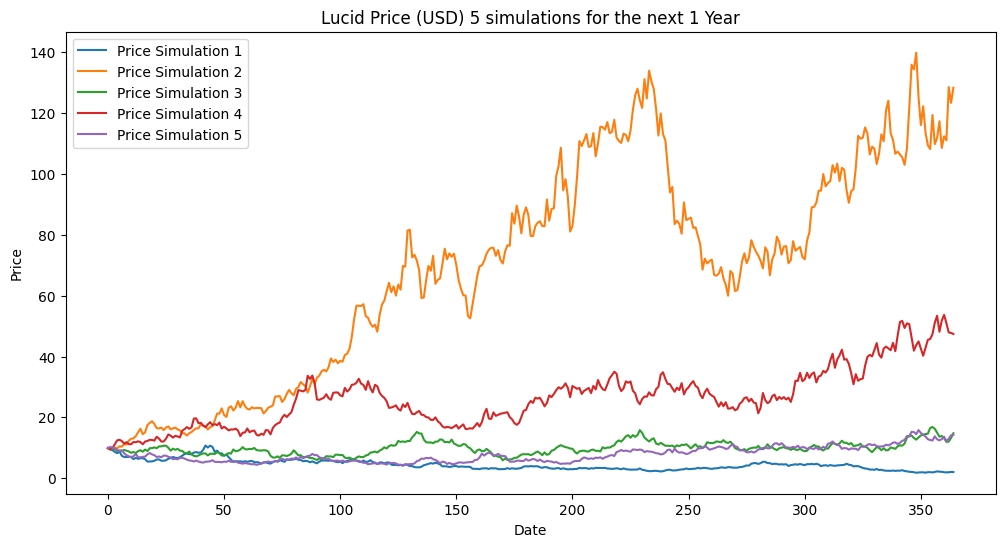

In [ ]:
plt.figure(figsize=(12,6))

# Assuming prices_list_1 is just a single list.
plt.plot(prices_list_1)

plt.title('Lucid Price (USD) 5 simulations for the next 1 Year')
plt.xlabel('Date')
plt.ylabel('Price')

# Now the legend function can find the label
plt.legend(["Price Simulation 1", "Price Simulation 2", "Price Simulation 3", "Price Simulation 4", "Price Simulation 5"])

plt.show()


In [ ]:
Tesla_Close = combine_stocks["Tesla_Close"]
Tesla_Close

Date
2023-11-03    219.9600
2023-11-02    218.5100
2023-11-01    205.6600
2023-10-31    200.8400
2023-10-30    197.3600
                ...   
2013-11-11      9.6465
2013-11-08      9.1967
2013-11-07      9.3181
2013-11-06     10.0773
2013-11-05     11.7873
Name: Tesla_Close, Length: 2517, dtype: float64

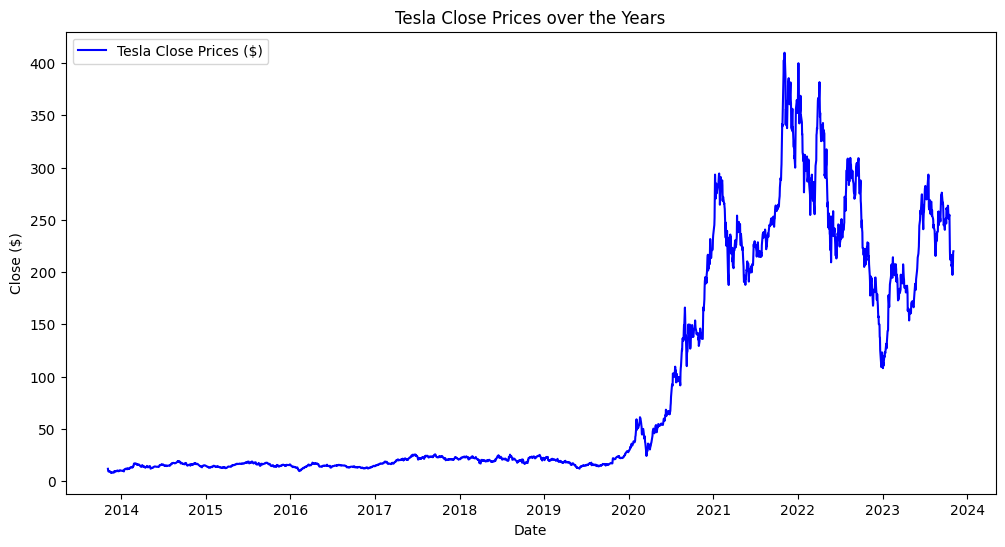

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(Tesla_Close.index, Tesla_Close, label='Tesla Close Prices ($)', color='blue')
plt.title('Tesla Close Prices over the Years')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [ ]:
mean_tesla_close = Tesla_Close.mean()
std_deviation_tesla = Tesla_Close.std()
print(mean_tesla_close)
print(std_deviation_tesla)

90.5575449741756
107.43991828580312


In [ ]:
# rolling_mean_tesla = Tesla_Close.rolling(window=5).mean()

In [ ]:
# plt.figure(figsize=(12, 6))
# plt.plot(Tesla_Close.index, Tesla_Close, label='Tesla', color='green')
# plt.plot(rolling_mean_tesla.index, rolling_mean_tesla, label='Rolling Mean Tesla Trend', color='orange')
# plt.title('Tesla Time Series with 5 Day Window Rolling Mean')
# plt.xlabel('Date')
# plt.ylabel('Exchange Rate')
# plt.legend()
# plt.show()

In [ ]:
# ma_day = [30,60,120,150]

# for ma in ma_day:
#         column_name = f"MA for {ma} days"
#         combine_stocks[column_name] = combine_stocks['Tesla_Close'].rolling(ma).mean()

In [ ]:
# plt.figure(figsize=(30,15))
# plt.plot(combine_stocks['Tesla_Close'],label='Close Price')
# plt.plot(combine_stocks['MA for 30 days'],label='30 days MA')
# plt.plot(combine_stocks['MA for 60 days'],label='60 days MA')
# plt.plot(combine_stocks['MA for 120 days'],label='120 days MA')
# plt.plot(combine_stocks['MA for 150 days'],label='150 days MA')
# plt.legend()
# plt.show()

In [ ]:
ma_day = [10,50,200]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        combine_stocks[column_name] = combine_stocks['Tesla_Close'].rolling(ma).mean()

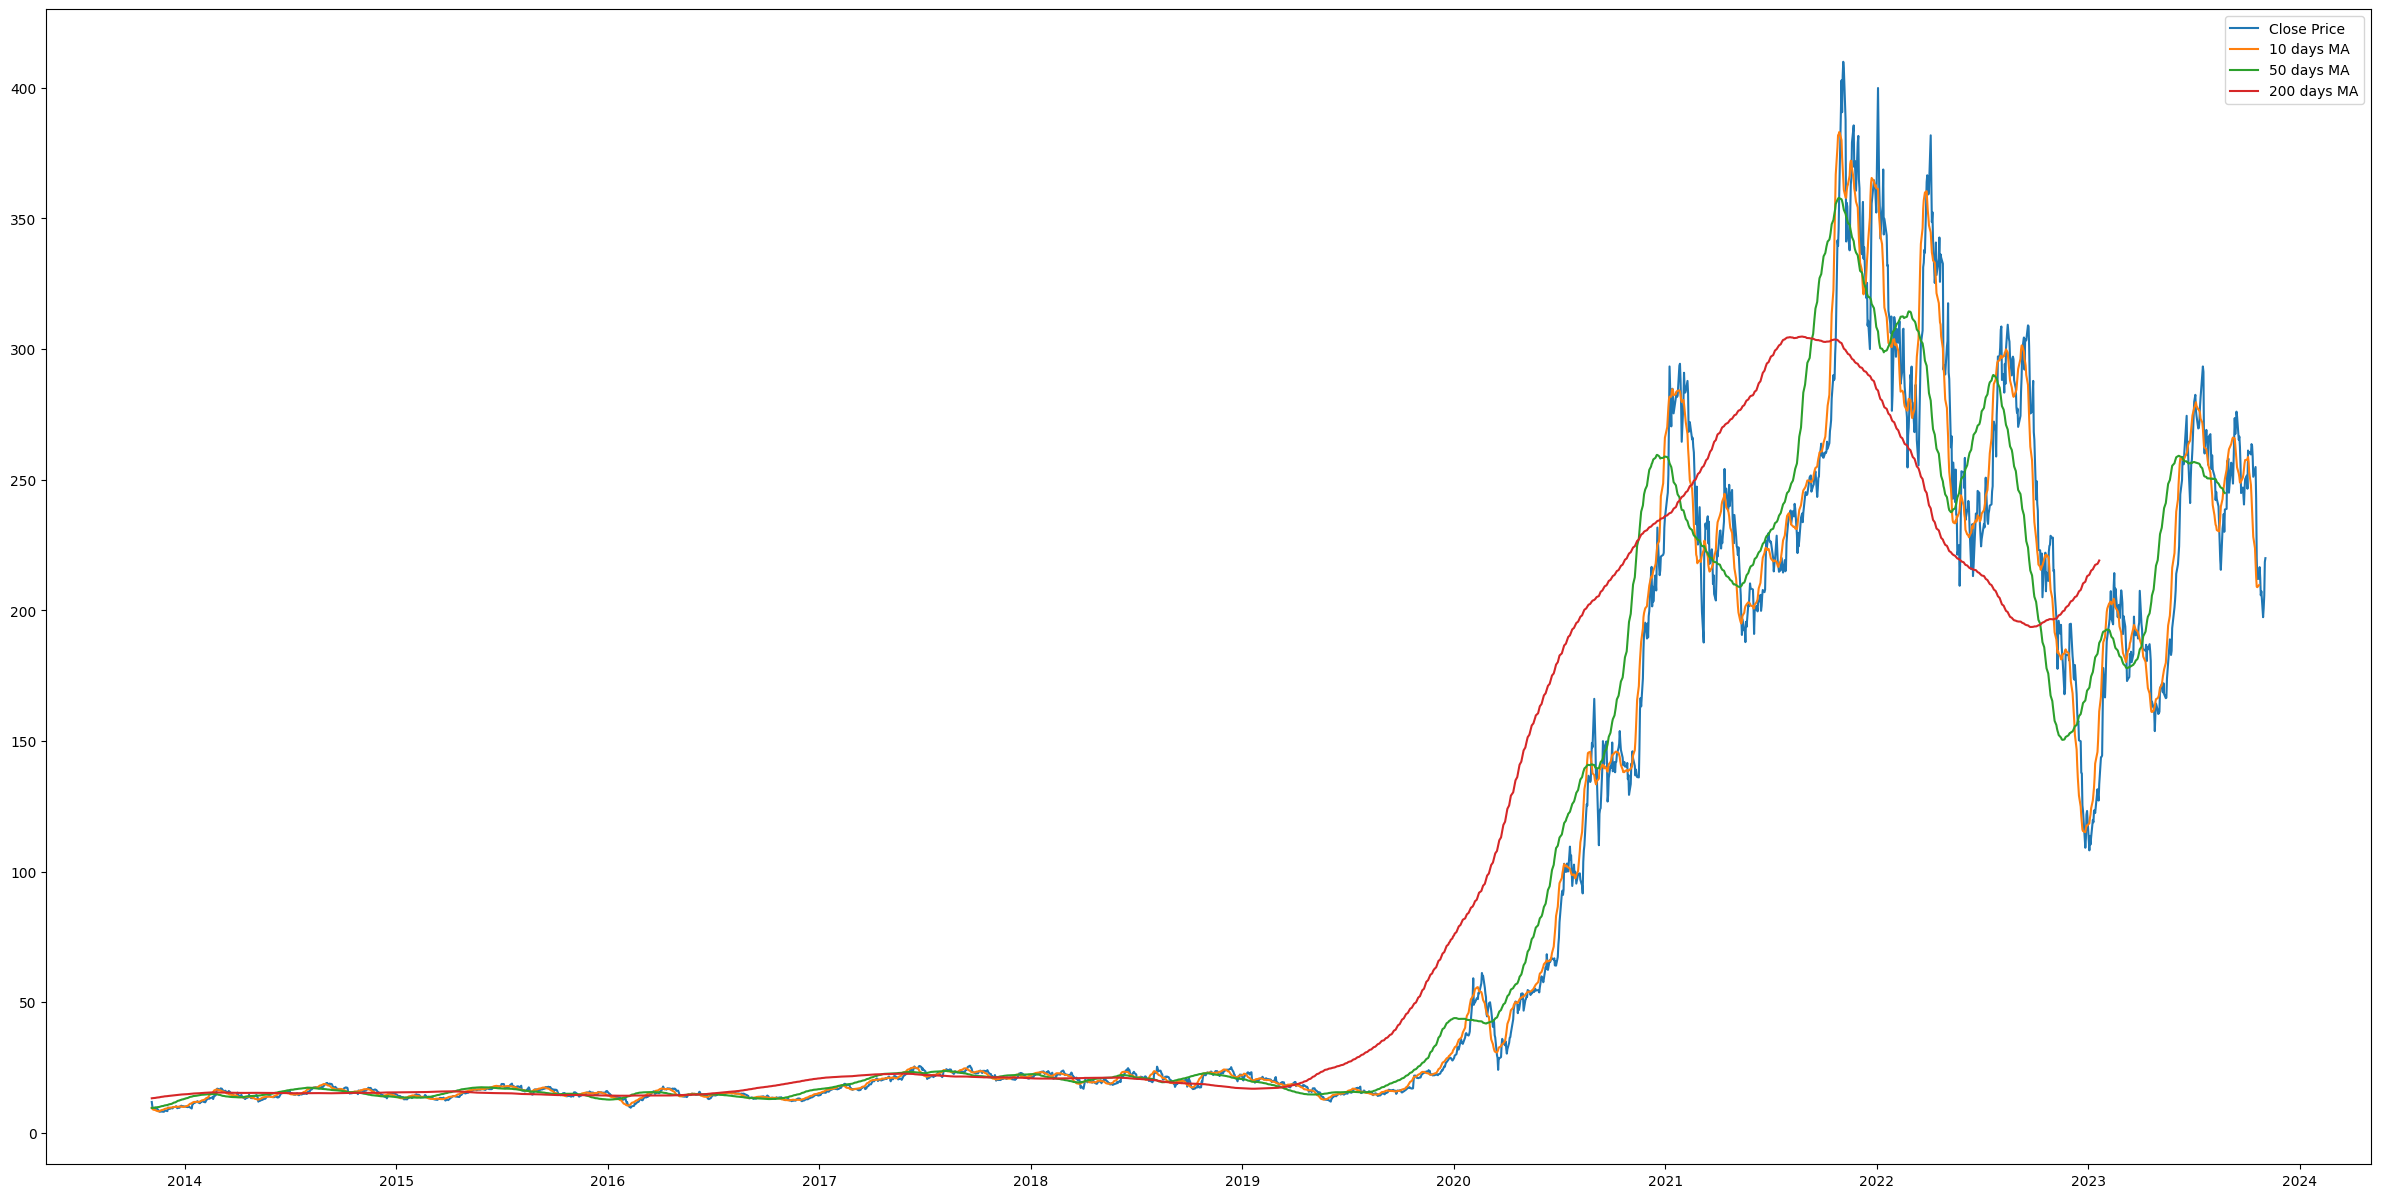

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(combine_stocks['Tesla_Close'],label='Close Price')
plt.plot(combine_stocks['MA for 10 days'],label='10 days MA')
plt.plot(combine_stocks['MA for 50 days'],label='50 days MA')
plt.plot(combine_stocks['MA for 200 days'],label='200 days MA')
plt.legend()
plt.show()


In [ ]:
Tesla_Closed_Series = combine_stocks [['Tesla_Close']]
Tesla_Closed_Series

,Tesla_Close
Date,
2023-11-03,219.9600
2023-11-02,218.5100
2023-11-01,205.6600
2023-10-31,200.8400
2023-10-30,197.3600
...,...
2013-11-11,9.6465
2013-11-08,9.1967
2013-11-07,9.3181


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
Tesla_Closed_Series = scaler.fit_transform(Tesla_Closed_Series)

In [ ]:
# Split the data into training and testing sets
train_size_2 = int(len(Tesla_Closed_Series) * 0.80)
test_size_2 = len(Tesla_Closed_Series) - train_size_2
train_data_2, test_data_2 = Tesla_Closed_Series[0:train_size_2], Tesla_Closed_Series[train_size_2:len(Tesla_Closed_Series)]

In [ ]:
# Create sequences for time series forecasting
def create_sequences(Tesla_Closed_Series, look_back_2):
    X_2, y_2 = [], []
    for n in range(len(Tesla_Closed_Series) - look_back_2):
        X_2.append(Tesla_Closed_Series[n:(n+look_back_2), 0])
        y_2.append(Tesla_Closed_Series[n + look_back_2, 0])
    return np.array(X_2), np.array(y_2)

look_back_2 = 10  # Number of previous time steps to use for prediction
X_train_2, y_train_2 = create_sequences(train_data_2, look_back_2)
X_test_2, y_test_2 = create_sequences(test_data_2, look_back_2)

In [ ]:
# Create and compile the LSTM model
model2 = Sequential()
model2.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back_2, 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dense(units=1))
model2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model2.fit(X_train_2, y_train_2, epochs=2000, batch_size=32)

Epoch 1/2000
63/63 [==============================] - 4s 14ms/step - loss: 0.0298
Epoch 2/2000
63/63 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 3/2000
63/63 [==============================] - 1s 13ms/step - loss: 0.0013
Epoch 4/2000
63/63 [==============================] - 1s 14ms/step - loss: 0.0014
Epoch 5/2000
63/63 [==============================] - 1s 24ms/step - loss: 0.0013
Epoch 6/2000
63/63 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 7/2000
63/63 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 8/2000
63/63 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 9/2000
63/63 [==============================] - 1s 13ms/step - loss: 9.3305e-04
Epoch 10/2000
63/63 [==============================] - 1s 16ms/step - loss: 0.0010
Epoch 11/2000
63/63 [==============================] - 1s 13ms/step - loss: 9.9711e-04
Epoch 12/2000
63/63 [==============================] - 1s 13ms/step - loss: 8.2722e-04
E

In [ ]:
# Make predictions
train_predict_2 = model.predict(X_train_2)
test_predict_2 = model.predict(X_test_2)

16/16 [==============================] - 0s 5ms/step


In [ ]:
# Inverse transform the predictions to the original scale
train_predict_2 = scaler.inverse_transform(train_predict_2)
y_train_2 = scaler.inverse_transform([y_train_2])
test_predict_2 = scaler.inverse_transform(test_predict_2)
y_test_2 = scaler.inverse_transform([y_test_2])

In [ ]:
# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score_2 = np.sqrt(mean_squared_error(y_train_2[0], train_predict_2[:, 0]))
test_score_2 = np.sqrt(mean_squared_error(y_test_2[0], test_predict_2[:, 0]))
print(f"Train RMSE: {train_score_2:.4f}")
print(f"Test RMSE: {test_score_2:.4f}")

Train RMSE: 18.1066
Test RMSE: 18.6444


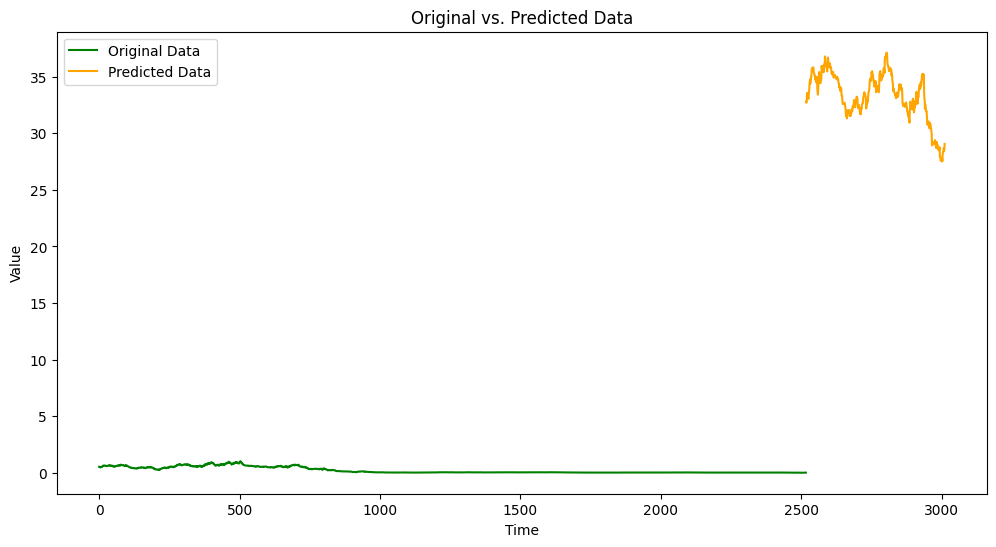

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(Tesla_Closed_Series)), Tesla_Closed_Series, label='Original Data', color='green')
plt.plot(np.arange(len(Tesla_Closed_Series), len(Tesla_Closed_Series) + len(test_predict_2)), test_predict_2, label='Predicted Data', color='orange')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [ ]:
Tesla_Predictions = combine_stocks ["Tesla_Close"]
Tesla_Predictions

Date
2023-11-03    219.9600
2023-11-02    218.5100
2023-11-01    205.6600
2023-10-31    200.8400
2023-10-30    197.3600
                ...   
2013-11-11      9.6465
2013-11-08      9.1967
2013-11-07      9.3181
2013-11-06     10.0773
2013-11-05     11.7873
Name: Tesla_Close, Length: 2517, dtype: float64

In [ ]:
log_returns_Tesla = np.log(1+ Tesla_Predictions.pct_change())
log_returns_Tesla.head()

Date
2023-11-03         NaN
2023-11-02   -0.006614
2023-11-01   -0.060607
2023-10-31   -0.023716
2023-10-30   -0.017479
Name: Tesla_Close, dtype: float64

In [ ]:
mean_tesla = log_returns_Tesla.mean()
var_tesla = log_returns_Tesla.var()
print(mean_tesla)
print(var_tesla)

-0.0011631252110294826
0.0012529445788497051


In [ ]:
stdev_tesla = log_returns_Tesla.std()
drift_tesla = mean_tesla -(0.5 * var_tesla) # u = average log return - half variance

drift_tesla
stdev_tesla

np.array(drift_tesla)
norm.ppf(0.95)

1.6448536269514722

In [ ]:
x_2 = np.random.rand(10,2) # to complete the second component aka volatility need to randomize using numpy. (10,2) turn our arrray into a multi dimensional one 2 columns by 10 r
x_2

array([[0.7482184 , 0.81548662],
       [0.83195757, 0.79400823],
       [0.7075944 , 0.06817391],
       [0.62532562, 0.80961597],
       [0.41949981, 0.42400186],
       [0.83044288, 0.34859723],
       [0.17581585, 0.44347855],
       [0.28065877, 0.01561129],
       [0.25413864, 0.60377514],
       [0.82686044, 0.98121244]])

In [ ]:
norm.ppf(x_2)

array([[ 0.66889385,  0.8982979 ],
       [ 0.96192983,  0.82040802],
       [ 0.54637062, -1.48953014],
       [ 0.31949819,  0.876482  ],
       [-0.20317325, -0.19166615],
       [ 0.95591687, -0.38911042],
       [-0.93142898, -0.1421556 ],
       [-0.58088563, -2.15422442],
       [-0.66152252,  0.26313086],
       [ 0.94183109,  2.07945972]])

In [ ]:
t_intervals_2 = 365 # t_intervals = time intervals. interested in forecast stock prices fornext 1000 days
iterations_2 = 5 # asking computer to produce 10 series of future stock price predicitions

In [ ]:
daily_returns_2 = np.exp(drift_tesla + stdev_tesla * norm.ppf(np.random.rand(t_intervals_2, iterations_2)))
daily_returns_2

array([[0.96232317, 0.99149264, 1.00527442, 1.011172  , 1.03796606],
       [1.05027713, 1.01595842, 0.99586909, 1.01192951, 0.95036508],
       [1.00705455, 0.92942286, 1.0417536 , 1.01095765, 1.0390579 ],
       ...,
       [0.97543443, 1.03668883, 1.00605359, 1.01888709, 0.98818203],
       [0.96594374, 0.98270993, 1.03651481, 0.99255764, 0.91548323],
       [0.97187857, 1.01438955, 0.99702637, 1.03560741, 0.98335501]])

In [ ]:
S0_1 = Tesla_Predictions.iloc[-1]
S0_1

11.7873

In [ ]:
prices_list_2= np.zeros_like(daily_returns_2) #zeros_like Return an array of zeros with the same shape and type as a given array
prices_list_2

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
prices_list_2[0] = S0_1 # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list_2

array([[11.7873, 11.7873, 11.7873, 11.7873, 11.7873],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

In [ ]:
for n in range(1, t_intervals_2): # this loop starts at day 1 and ends of day 1000
  prices_list_2[n] = prices_list_2[n-1] * daily_returns_2[n]

prices_list_2

array([[11.7873    , 11.7873    , 11.7873    , 11.7873    , 11.7873    ],
       [12.37993164, 11.97540664, 11.73860776, 11.92791673, 11.20223825],
       [12.46726649, 11.13021674, 12.22873685, 12.05861869, 11.63977416],
       ...,
       [ 5.222429  ,  2.23882926,  5.40604725, 10.75195948,  3.19869893],
       [ 5.0445726 ,  2.20011975,  5.60344802, 10.67193958,  2.92835524],
       [ 4.90271199,  2.23177848,  5.58678542, 11.05193976,  2.87961279]])

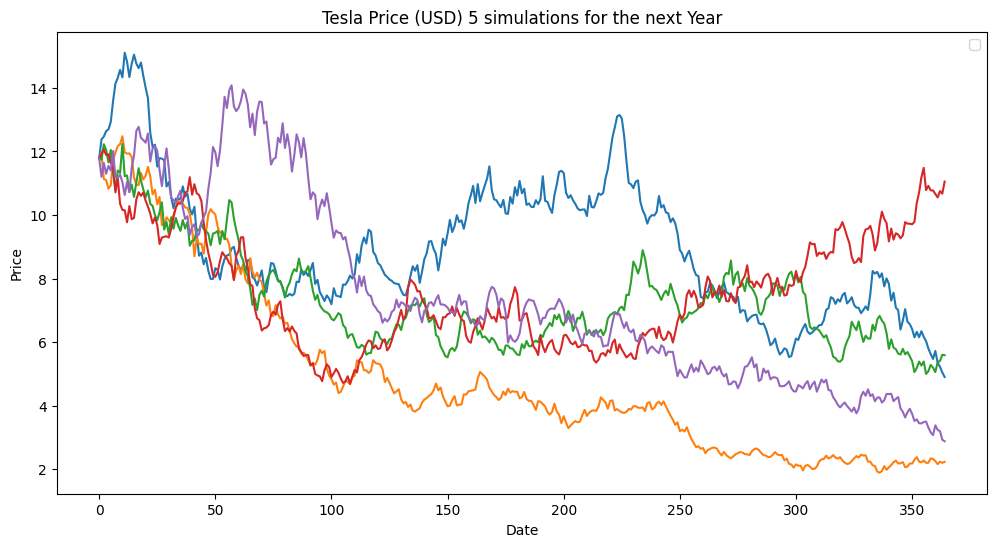

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(prices_list_2)
plt.title('Tesla Price (USD) 5 simulations for the next Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

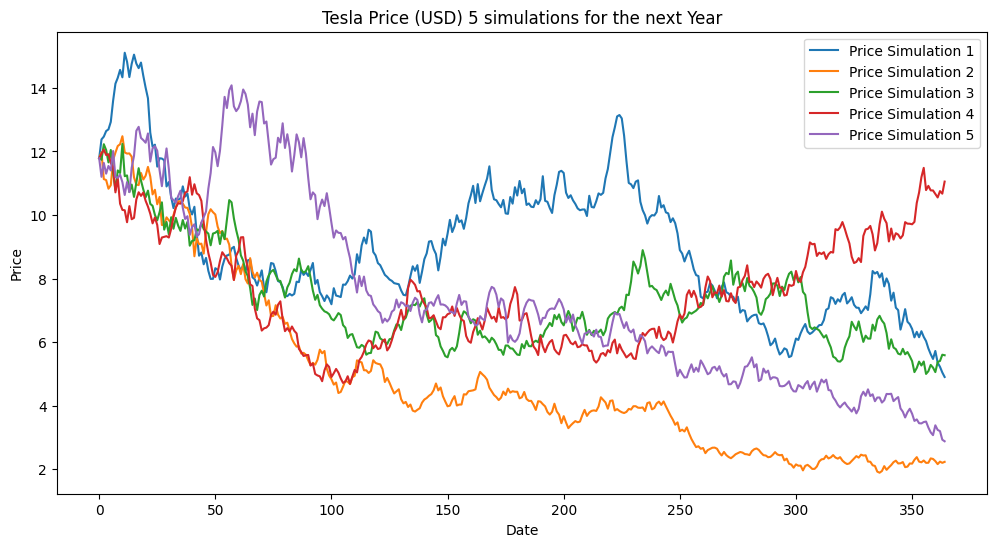

In [ ]:
plt.figure(figsize=(12,6))

# Assuming prices_list_1 is just a single list.
plt.plot(prices_list_2)

plt.title('Tesla Price (USD) 5 simulations for the next Year')
plt.xlabel('Date')
plt.ylabel('Price')

# Now the legend function can find the label
plt.legend(["Price Simulation 1", "Price Simulation 2", "Price Simulation 3", "Price Simulation 4", "Price Simulation 5"])

plt.show()
